# This notenook will use the intersection tool to select the census block we are interested in viewing by using the Austin City Limits full jurisdiction shapefile as our boundary.

#### We want to import census block data, City Jurisdiction data, and census data

* Bring in Jurisdiction data and create a shapefile based solely on the areas listed as 'Full Jurisdiction'
* Use the City limits shapefile created from the full jurisdiction and overlay it over the census block shapefile to create a shapefile of only the census block groups within city limits
* Dissolve the census blocks into block groups
* Take census block group and census excel data and combine them. 




In [1]:
import geopandas as gpd
import os
import getpass
import matplotlib.pyplot as plt
import re
import pandas as pd

In [2]:
# Find working directory, saves the path while appending the notebooks file name. 
# wd is now the file path to the park-equity-atx directory.
wd = os.getcwd()
wd = wd[:wd.find('notebooks')]
wd

'C:\\Users\\Victoria\\Desktop\\THESIS\\Analysis\\gitproject\\park-equity-atx\\'

In [3]:
acl = gpd.read_file(wd+'data/fulljurisdiction/austincitylimits.shp')

In [4]:
acl

,city_name,jurisdicti,jurisdic_1,jurisdic_2,jurisdic_3,modified_f,objectid,shape_area,shape_leng,geometry
0,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,400630281.0,210.0,496.0,7.162866e+06,1.302898e+04,"POLYGON ((3149772.649999953 10102980.41455244,..."
1,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,400455693.0,210.0,261.0,7.167226e+06,1.219104e+04,"POLYGON ((3124422.400169658 10042070.34434179,..."
2,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3086815.032605638 10026999.74263538,..."
3,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,400455695.0,210.0,167.0,5.040355e+07,6.169732e+04,"POLYGON ((3156266.481084739 10027546.71252559,..."


Text(0.5, 1, 'Austin City Limits - Full Jurisdiction')

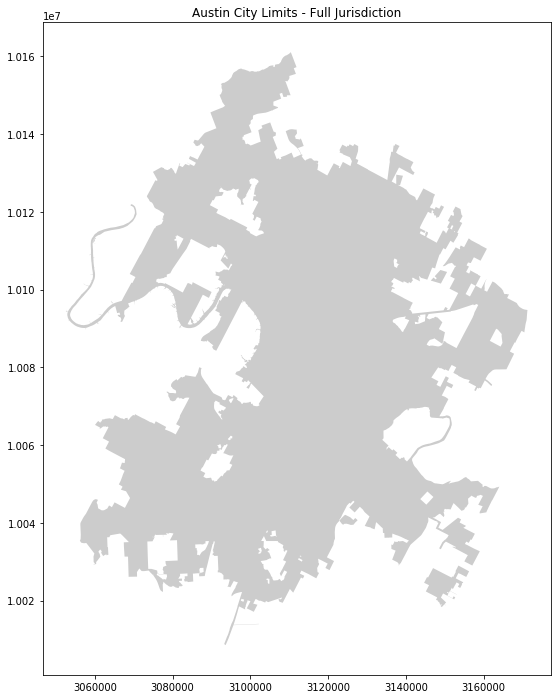

In [5]:
fig1, ax = plt.subplots(figsize=(12,12))
a = acl.plot(ax=ax, color="black", alpha=0.2)
# a = acl.plot(ax=ax, color=None, alpha=1)
#Projection for city data is NAD 1983 StatePlane Texas Central FIPS 4203 Feet
#acl.crs = {'init': 'epsg:102739'}
##export to shapefile 
#acl.to_file("test_acl.shp")
plt.title("Austin City Limits - Full Jurisdiction")

In [6]:
censusblocks = gpd.read_file(wd+"data/censusblocks2010/2010 Census Blocks.shp")

In [7]:
censusblocks

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,48,021,950501,1084,480219505011084,Block 1084,G5040,None,None,S,88302.0,0.0,+30.2440455,-097.3206868,"POLYGON ((3247429.311608136 10066855.95115057,..."
1,48,021,950501,1016,480219505011016,Block 1016,G5040,None,None,S,269978.0,0.0,+30.2543835,-097.2558527,"POLYGON ((3268792.360745475 10069865.16986965,..."
2,48,021,950501,1066,480219505011066,Block 1066,G5040,None,None,S,14684.0,0.0,+30.2334597,-097.2729103,"POLYGON ((3262623.121115476 10061369.03758372,..."
3,48,021,950501,1039,480219505011039,Block 1039,G5040,None,None,S,1168008.0,35209.0,+30.2230089,-097.2897090,"POLYGON ((3256433.172209308 10060583.71107039,..."
4,48,021,950501,1017,480219505011017,Block 1017,G5040,None,None,S,1096.0,0.0,+30.2432609,-097.2677017,"POLYGON ((3264466.476352632 10065486.67206497,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34248,48,491,020509,3008,484910205093008,Block 3008,G5040,None,None,S,103914.0,0.0,+30.5158676,-097.7468614,"POLYGON ((3110381.121466219 10161170.6457229, ..."
34249,48,491,021508,2015,484910215082015,Block 2015,G5040,None,None,S,9049.0,0.0,+30.5161450,-097.6554348,"POLYGON ((3139663.432324052 10160956.46997015,..."
34250,48,491,021506,2017,484910215062017,Block 2017,G5040,None,None,S,18895.0,0.0,+30.5483324,-097.6170553,"POLYGON ((3151155.829286724 10173725.23117797,..."
34251,48,491,020708,1027,484910207081027,Block 1027,G5040,None,None,S,0.0,569.0,+30.5020675,-097.6426007,"POLYGON ((3143907.062944382 10156610.06527714,..."


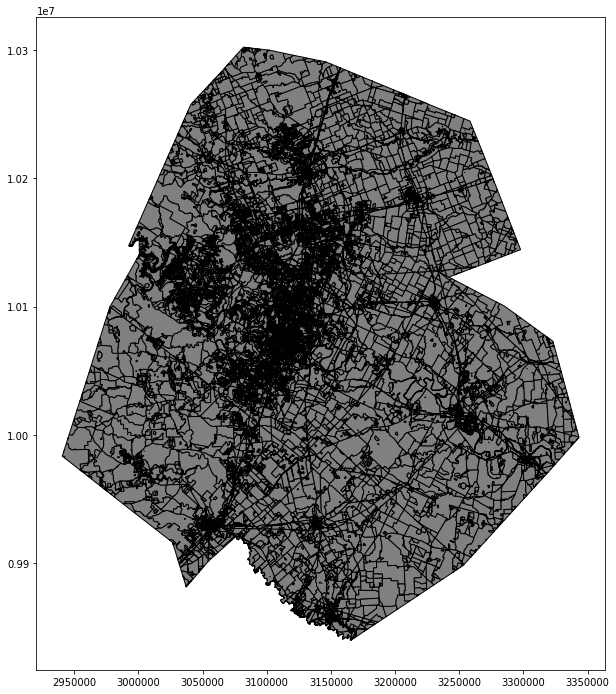

In [8]:
#censusblocks.crs = {'init': 'epsg:102739'}
fig2, ax = plt.subplots(figsize=(12,12))
base = censusblocks.plot(ax=ax, color="black", alpha=0.2)
layer = censusblocks["geometry"].plot(ax=base, color='grey', edgecolor = 'black')
# cb= censusblocks.plot(ax=ax, color=None, alpha=1)

In [9]:
cbintersection = gpd.overlay(censusblocks, acl, how = 'intersection')

C:\Users\Victoria\Anaconda3\lib\site-packages\geopandas\base.py:29: UserWarning: GeoSeries crs mismatch: {'proj': 'lcc', 'lat_1': 30.11666666666667, 'lat_2': 31.88333333333333, 'lat_0': 29.66666666666667, 'lon_0': -100.3333333333333, 'x_0': 699999.9999999999, 'y_0': 3000000, 'datum': 'NAD83', 'units': 'us-ft', 'no_defs': True} and {'proj': 'lcc', 'lat_1': 30.11666666666667, 'lat_2': 31.88333333333333, 'lat_0': 29.66666666666667, 'lon_0': -100.3333333333333, 'x_0': 700000, 'y_0': 3000000, 'datum': 'NAD83', 'units': 'us-ft', 'no_defs': True}
  other.crs))


In [10]:
cbintersection 

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,FUNCSTAT10,...,city_name,jurisdicti,jurisdic_1,jurisdic_2,jurisdic_3,modified_f,objectid,shape_area,shape_leng,geometry
83,48,209,010901,1000,482090109011000,Block 1000,G5040,None,None,S,...,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3056196.943745553 10035434.26038514,..."
84,48,209,010901,1004,482090109011004,Block 1004,G5040,None,None,S,...,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3060340.445818823 10029833.26098854,..."
113,48,209,010908,1002,482090109081002,Block 1002,G5040,None,None,S,...,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3093543.514055388 10008616.78846859,..."
121,48,209,010901,1005,482090109011005,Block 1005,G5040,None,None,S,...,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3063053.367280419 10031649.19700599,..."
122,48,209,010901,1037,482090109011037,Block 1037,G5040,None,None,S,...,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3068833.199734814 10026135.52516772,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10758,48,453,002432,1003,484530024321003,Block 1003,G5040,None,None,S,...,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,400455693.0,210.0,261.0,7.167226e+06,1.219104e+04,"POLYGON ((3126593.208481835 10039593.48612599,..."
11403,48,453,002431,1029,484530024311029,Block 1029,G5040,None,None,S,...,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,400455693.0,210.0,261.0,7.167226e+06,1.219104e+04,"POLYGON ((3124244.020686546 10041958.67529428,..."
12290,48,453,002431,3005,484530024313005,Block 3005,G5040,None,None,S,...,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,400455693.0,210.0,261.0,7.167226e+06,1.219104e+04,"POLYGON ((3122958.493460868 10040504.67851107,..."
13615,48,453,002431,3004,484530024313004,Block 3004,G5040,None,None,S,...,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,400455693.0,210.0,261.0,7.167226e+06,1.219104e+04,"POLYGON ((3122966.211781546 10040513.36111932,..."


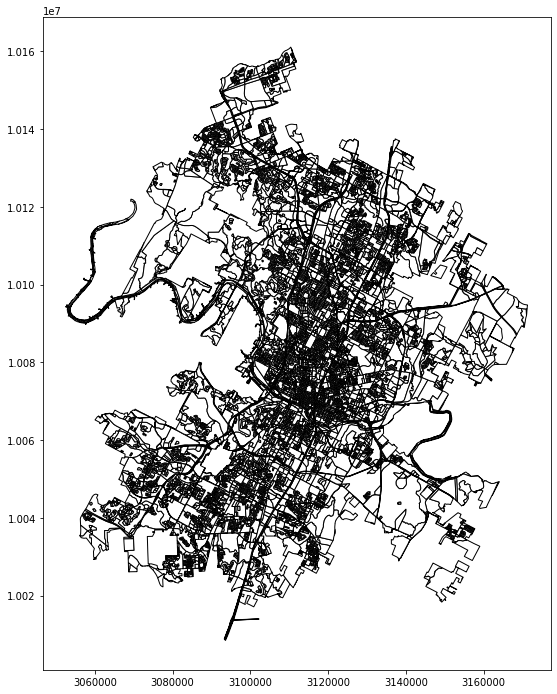

In [11]:
#cbintersection.crs = {'init': 'epsg:102739'}
fig3, ax = plt.subplots(figsize=(12,12))
base = cbintersection.plot(ax=ax, color="black", alpha=0.2)
layer = cbintersection["geometry"].plot(ax=base, color='white', edgecolor = 'black')

# cbi = cbintersection.plot(ax=ax, color=None, alpha=1)

In [12]:
#export to shapefile 
cbintersection.to_file(wd+"data/cbintersection/cbi.shp")

# Creation of the Census Block Groups shapefile
##### This shapefile can be merged with any future cesus block group data for analysis purposes. The 'GeoID' attribute serves as the link to merge data sets.

In [ ]:
import geopandas as gpd
import os
import getpass
import matplotlib.pyplot as plt
import re
import pandas as pd

In [ ]:
wd = os.getcwd()
wd = wd[:wd.find('notebooks')]
wd

In [13]:
blocks = gpd.read_file(wd+"data/cbintersection/cbi.shp")

In [17]:
print(blocks['GEOID10'].head)

<bound method NDFrame.head of 0        482090109011000
1        482090109011004
2        482090109081002
3        482090109011005
4        482090109011037
              ...       
10928    484530024321003
10929    484530024311029
10930    484530024313005
10931    484530024313004
10932    484530018562036
Name: GEOID10, Length: 10933, dtype: object>


According to the [documentation](https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html) we have that the geocodes are each representing block data. Census tables will have a 12 digit geoID and the census blocks data will have a 15 digit block ID. Thus, in order to merge the files a new column called 'blockGroups' will be created that includes only the first 12 digits of the block ID. Then the census block groups will be created by dissolving by 'blockGroups'. When merging any census data tables to this file, the 'blockGroups' attribute will be equal to the 'ID2' attribute found in census data tables.

In [18]:
blockgroup = blocks['GEOID10'].str.slice(start=0, stop=12)
blockgroup

0        482090109011
1        482090109011
2        482090109081
3        482090109011
4        482090109011
             ...     
10928    484530024321
10929    484530024311
10930    484530024313
10931    484530024313
10932    484530018562
Name: GEOID10, Length: 10933, dtype: object

In [19]:
blocks['blockGroups'] = blockgroup

In [20]:
blocks.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,FUNCSTAT10,...,jurisdicti,jurisdic_1,jurisdic_2,jurisdic_3,modified_f,objectid,shape_area,shape_leng,geometry,blockGroups
0,48,209,010901,1000,482090109011000,Block 1000,G5040,None,None,S,...,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3056196.943745553 10035434.26038514,...",482090109011
1,48,209,010901,1004,482090109011004,Block 1004,G5040,None,None,S,...,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3060340.445818823 10029833.26098854,...",482090109011
2,48,209,010908,1002,482090109081002,Block 1002,G5040,None,None,S,...,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3093543.514055388 10008616.78846859,...",482090109081
3,48,209,010901,1005,482090109011005,Block 1005,G5040,None,None,S,...,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3063053.367280419 10031649.19700599,...",482090109011
4,48,209,010901,1037,482090109011037,Block 1037,G5040,None,None,S,...,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3068833.199734814 10026135.52516772,...",482090109011


In [21]:
cbgdiss = blocks.copy()
cbgdiss.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,FUNCSTAT10,...,jurisdicti,jurisdic_1,jurisdic_2,jurisdic_3,modified_f,objectid,shape_area,shape_leng,geometry,blockGroups
0,48,209,010901,1000,482090109011000,Block 1000,G5040,None,None,S,...,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3056196.943745553 10035434.26038514,...",482090109011
1,48,209,010901,1004,482090109011004,Block 1004,G5040,None,None,S,...,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3060340.445818823 10029833.26098854,...",482090109011
2,48,209,010908,1002,482090109081002,Block 1002,G5040,None,None,S,...,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3093543.514055388 10008616.78846859,...",482090109081
3,48,209,010901,1005,482090109011005,Block 1005,G5040,None,None,S,...,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3063053.367280419 10031649.19700599,...",482090109011
4,48,209,010901,1037,482090109011037,Block 1037,G5040,None,None,S,...,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3068833.199734814 10026135.52516772,...",482090109011


In [22]:
cbgdiss=cbgdiss.dissolve(by='blockGroups')
cbgdiss= cbgdiss.rename(columns={'blockGroups':'Id2'})
cbgdiss

,geometry,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,...,INTPTLON10,city_name,jurisdicti,jurisdic_1,jurisdic_2,jurisdic_3,modified_f,objectid,shape_area,shape_leng
blockGroups,,,,,,,,,,,,,,,,,,,,,
482090109011,(POLYGON ((3069238.317597136 10028016.96124339...,48,209,010901,1000,482090109011000,Block 1000,G5040,None,None,...,-097.9267996,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06
482090109081,"POLYGON ((3093548.488136798 10008631.07120948,...",48,209,010908,1002,482090109081002,Block 1002,G5040,None,None,...,-097.8116716,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06
484530001011,"POLYGON ((3111310.38010639 10089474.08471997, ...",48,453,000101,1002,484530001011002,Block 1002,G5040,None,None,...,-097.7546582,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06
484530001012,"POLYGON ((3109356.370562971 10091521.99532232,...",48,453,000101,2020,484530001012020,Block 2020,G5040,None,None,...,-097.7516364,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06
484530001013,"POLYGON ((3110878.498096138 10085236.13059747,...",48,453,000101,3000,484530001013000,Block 3000,G5040,None,None,...,-097.7515898,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484910205082,"POLYGON ((3100132.260730386 10153583.00965148,...",48,491,020508,2002,484910205082002,Block 2002,G5040,None,None,...,-097.7810354,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06
484910205091,"POLYGON ((3103596.356820554 10154673.60852015,...",48,491,020509,1006,484910205091006,Block 1006,G5040,None,None,...,-097.7591338,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06
484910205093,"POLYGON ((3111608.114134961 10157930.24793274,...",48,491,020509,3019,484910205093019,Block 3019,G5040,None,None,...,-097.7470943,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06


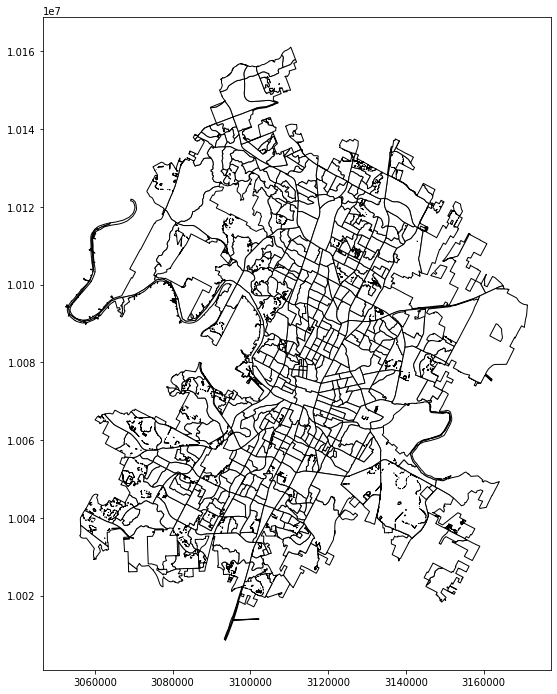

In [23]:
fig4, ax = plt.subplots(figsize=(12,12))
base = cbgdiss.plot(ax=ax, color="black", alpha=0.2)
layer = cbgdiss["geometry"].plot(ax=base, color='white', edgecolor = 'black')

In [24]:
#This shapefile contains the census block groups for Austin City Limits 
cbgdiss.to_file(wd+"data/censusblockgroups/cbg.shp")

# Creation of the Census Block Group shapefile with population count data included 
#### The 'blockGroups' census block group attribute is the same as the Id2 attribute in the census data excel files

In [14]:
import geopandas as gpd
import os
import getpass
import matplotlib.pyplot as plt
import re
import pandas as pd

In [15]:
wd = os.getcwd()
wd = wd[:wd.find('notebooks')]

In [17]:
cbg = gpd.read_file(wd+"data/censusblockgroups/cbg.shp")
poptable = pd.read_excel(wd+"data/censustables/ACS_17_5yr_totalpop_allcounties.xlsx")

In [18]:
cbgroups = cbg.copy()
pop = poptable.copy()
print(cbgroups['GEOID10'].head)
print(poptable['Id2'].head)

<bound method NDFrame.head of 0      482090109011000
1      482090109081002
2      484530001011002
3      484530001012020
4      484530001013000
            ...       
553    484910205082002
554    484910205091006
555    484910205093019
556    484910205101010
557    484910205103007
Name: GEOID10, Length: 558, dtype: object>
<bound method NDFrame.head of 0      482090101001
1      482090101002
2      482090102001
3      482090102002
4      482090102003
           ...     
898    484910216013
899    484910216021
900    484910216022
901    484910216031
902    484910216032
Name: Id2, Length: 903, dtype: int64>


#### Convert the ID2 column to string data type. This will simplify the merge 

In [22]:
blockgroup = cbgroups['GEOID10'].str.slice(start=0, stop=12)
blockgroup

pop['Id2'] = pop['Id2'].astype(str)

In [26]:
popmerger = cbgroups.merge(pop, left_on=blockgroup, right_on='Id2', suffixes=('_cbgroups', '_poptable'))

In [27]:
popmerger

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,FUNCSTAT10,...,jurisdic_2,jurisdic_3,modified_f,objectid,shape_area,shape_leng,geometry,Id,Id2,Estimate; Total
0,48,209,010901,1000,482090109011000,Block 1000,G5040,None,None,S,...,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,(POLYGON ((3069238.317597136 10028016.96124339...,1500000US482090109011,482090109011,2205
1,48,209,010908,1002,482090109081002,Block 1002,G5040,None,None,S,...,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3093548.488136798 10008631.07120948,...",1500000US482090109081,482090109081,3774
2,48,453,000101,1002,484530001011002,Block 1002,G5040,None,None,S,...,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3111310.38010639 10089474.08471997, ...",1500000US484530001011,484530001011,1045
3,48,453,000101,2020,484530001012020,Block 2020,G5040,None,None,S,...,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3109356.370562971 10091521.99532232,...",1500000US484530001012,484530001012,1202
4,48,453,000101,3000,484530001013000,Block 3000,G5040,None,None,S,...,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3110878.498096138 10085236.13059747,...",1500000US484530001013,484530001013,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,48,491,020508,2002,484910205082002,Block 2002,G5040,None,None,S,...,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3100132.260730386 10153583.00965148,...",1500000US484910205082,484910205082,1264
554,48,491,020509,1006,484910205091006,Block 1006,G5040,None,None,S,...,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3103596.356820554 10154673.60852015,...",1500000US484910205091,484910205091,2504
555,48,491,020509,3019,484910205093019,Block 3019,G5040,None,None,S,...,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3111608.114134961 10157930.24793274,...",1500000US484910205093,484910205093,3192
556,48,491,020510,1010,484910205101010,Block 1010,G5040,None,None,S,...,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3105356.685648963 10148942.41788282,...",1500000US484910205101,484910205101,4695


### This creates a shapefile for the combination of the census population count excelsheet and census blocks shapefile

In [25]:
popmerger.to_file(wd+"data/blockgroups_censusdata/popmerge.shp")

### The same steps from above will be used to create shapefiles for the merging of other census demographic data

In [17]:
cbg = gpd.read_file(wd+"data/censusblockgroups/cbg.shp")
racetable = pd.read_excel(wd+"data/censustables/ACS_17_5YR_race_includinglatinx.xlsx")

cbgroups2 = cbg.copy()
race = racetable.copy()
print(cbgroups2['GEOID10'].head)
print(racetable['Id2'].head)

blockgroup2 = cbgroups2['GEOID10'].str.slice(start=0, stop=12)
blockgroup2

race['Id2'] = race['Id2'].astype(str)

racemerger = cbgroups.merge(race, left_on=blockgroup2, right_on='Id2', suffixes=('_cbgroups2', '_racetable'))
racemerger.to_file(wd+"data/blockgroups_censusdata/racemerge.shp")
racemerger

<bound method NDFrame.head of 0      482090109011000
1      482090109081002
2      484530001011002
3      484530001012020
4      484530001013000
            ...       
553    484910205082002
554    484910205091006
555    484910205093019
556    484910205101010
557    484910205103007
Name: GEOID10, Length: 558, dtype: object>
<bound method NDFrame.head of 0      482090101001
1      482090101002
2      482090102001
3      482090102002
4      482090102003
           ...     
898    484910216013
899    484910216021
900    484910216022
901    484910216031
902    484910216032
Name: Id2, Length: 903, dtype: int64>


NameError: name 'cbgroups' is not defined

In [8]:
cbg = gpd.read_file(wd+"data/censusblockgroups/cbg.shp")
incometable = pd.read_csv(wd+"data/censustables/ACS_17_5YR_Household_Income.csv")

cbgroups3 = cbg.copy()
income = incometable.copy()
print(cbgroups3['GEOID10'].head)
print(incometable['Id2'].head)

blockgroup3 = cbgroups3['GEOID10'].str.slice(start=0, stop=12)
blockgroup3

income['Id2'] = income['Id2'].astype(str)

incomemerger = cbgroups3.merge(income, left_on=blockgroup3, right_on='Id2', suffixes=('_cbgroups3', '_incometable'))
incomemerger
#incomemerger.to_file(wd+"data/blockgroups_censusdata/incomemerge.shp")

<bound method NDFrame.head of 0      482090109011000
1      482090109081002
2      484530001011002
3      484530001012020
4      484530001013000
            ...       
553    484910205082002
554    484910205091006
555    484910205093019
556    484910205101010
557    484910205103007
Name: GEOID10, Length: 558, dtype: object>
<bound method NDFrame.head of 0      482090000000
1      482090000000
2      482090000000
3      482090000000
4      482090000000
           ...     
898    484910000000
899    484910000000
900    484910000000
901    484910000000
902    484910000000
Name: Id2, Length: 903, dtype: int64>


,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,FUNCSTAT10,...,"Estimate; Total: - $75,000 to $99,999","Margin of Error; Total: - $75,000 to $99,999","Estimate; Total: - $100,000 to $124,999","Margin of Error; Total: - $100,000 to $124,999","Estimate; Total: - $125,000 to $149,999","Margin of Error; Total: - $125,000 to $149,999","Estimate; Total: - $150,000 to $199,999","Margin of Error; Total: - $150,000 to $199,999","Estimate; Total: - $200,000 or more","Margin of Error; Total: - $200,000 or more"
